## Grondwaterstanden

In [1]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
gwfilter = GrondwaterFilterSearch()
from owslib.fes2 import PropertyIsEqualTo

query = PropertyIsEqualTo(
            propertyname='pkey_filter',
            literal='https://www.dov.vlaanderen.be/data/filter/1979-006377')


df = gwfilter.search(query=query)
df['year'] = df['datum'].apply(lambda x: str(x.year))

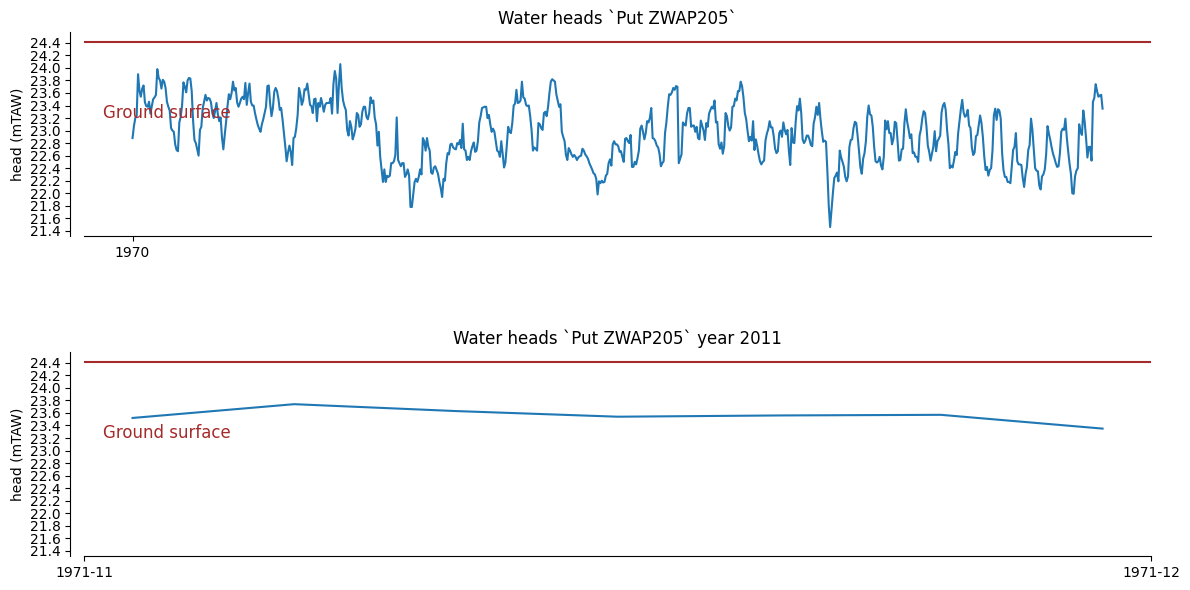

In [48]:
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from matplotlib.ticker import MaxNLocator, MultipleLocator

# Get height of ground surface
ground_surface = df["mv_mtaw"][0]

# create a plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6),
                               sharex=False, sharey=True)

# Plot entire time series in the upper plot
df['peil_mtaw'].plot(ax=ax1, title='Water heads `Hoek Krekelbergstraat nr 2- Ploegsdijk`')
ax1.xaxis.set_major_locator(YearLocator(5))
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

# Plot the data for 2011 in the lower plot
df = df[df['year'] >= '2010']
df['peil_mtaw'].plot(ax=ax2,  title='Water heads `Hoek Krekelbergstraat nr 2- Ploegsdijk` year 2024')
ax2.xaxis.set_major_locator(MonthLocator(interval=3))
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Adjust configuration of plot
for ax in (ax1, ax2):
    ax.set_xlabel('')
    ax.set_ylabel('head (mTAW)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
        tick.set_horizontalalignment('center')

    # Only draw spine between the y-ticks
    ax.spines['left'].set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_major_locator(MultipleLocator(0.2))

    # Add the ground surface (provided in the data) on the subplots
    ax.axhline(ground_surface, color = 'brown')
    ax.annotate('Ground surface',
             xy=(0.05, 0.68),
             xycoords='axes fraction',
             xytext=(-25, -15), textcoords='offset points',
             fontsize=12, color='brown')

fig.tight_layout(h_pad=5)

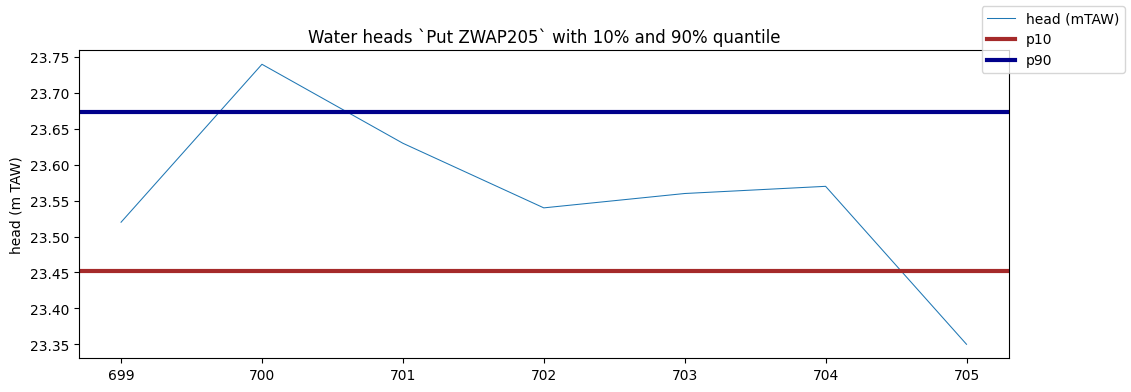

In [49]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df["peil_mtaw"], label='head (mTAW)', linewidth=0.75)

ax.axhline(df["peil_mtaw"].quantile(0.1), color = 'brown', label='p10', linewidth=3)
ax.axhline(df["peil_mtaw"].quantile(0.9), color = 'darkblue', label='p90', linewidth=3)
handles, labels = ax.get_legend_handles_labels()

ax.set_title('Water heads `Put ZWAP205` with 10% and 90% quantile');
ax.set_ylabel('head (m TAW)');
ax.set_xlabel('');

fig.legend(handles, labels)

## Sondeerverslagen

In [5]:
from pydov.search.sondering import SonderingSearch
from pydov.util.location import Within, Box

sondering = SonderingSearch()
df = sondering.search(location=Within(Box(169500, 226000, 173400, 227250)))
df.head()

[000/001] .
[000/015] ccccccccccccc..


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,...,apparaat,datum_gw_meting,diepte_gw_m,lengte,diepte,qc,Qt,fs,u,i
0,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/039-S1,169701.5,227019.5,NaN,24.94,0.0,10.0,2002-11-29,MVG - Afdeling Geotechniek,...,200 kN - RUPS,2002-11-29 11:40:00,0.33,0.05,0.05,0.08,NaN,0.0,NaN,0.0
1,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/039-S1,169701.5,227019.5,NaN,24.94,0.0,10.0,2002-11-29,MVG - Afdeling Geotechniek,...,200 kN - RUPS,2002-11-29 11:40:00,0.33,0.10,0.10,0.09,NaN,0.0,NaN,-0.1
2,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/039-S1,169701.5,227019.5,NaN,24.94,0.0,10.0,2002-11-29,MVG - Afdeling Geotechniek,...,200 kN - RUPS,2002-11-29 11:40:00,0.33,0.15,0.15,0.30,NaN,0.0,NaN,-0.2
3,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/039-S1,169701.5,227019.5,NaN,24.94,0.0,10.0,2002-11-29,MVG - Afdeling Geotechniek,...,200 kN - RUPS,2002-11-29 11:40:00,0.33,0.20,0.20,0.30,NaN,0.0,NaN,-0.3
4,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/039-S1,169701.5,227019.5,NaN,24.94,0.0,10.0,2002-11-29,MVG - Afdeling Geotechniek,...,200 kN - RUPS,2002-11-29 11:40:00,0.33,0.25,0.25,0.71,NaN,10.0,NaN,-0.3


In [20]:
ls_sonderings = list(df.groupby('pkey_sondering').count().reset_index().iloc[:,0])
ls_sonderings

['https://www.dov.vlaanderen.be/data/sondering/1942-053871',
 'https://www.dov.vlaanderen.be/data/sondering/1942-053873',
 'https://www.dov.vlaanderen.be/data/sondering/1969-030649',
 'https://www.dov.vlaanderen.be/data/sondering/1969-030650',
 'https://www.dov.vlaanderen.be/data/sondering/1976-030721',
 'https://www.dov.vlaanderen.be/data/sondering/1976-030793',
 'https://www.dov.vlaanderen.be/data/sondering/1976-030805',
 'https://www.dov.vlaanderen.be/data/sondering/1976-030817',
 'https://www.dov.vlaanderen.be/data/sondering/2001-009075',
 'https://www.dov.vlaanderen.be/data/sondering/2001-009076',
 'https://www.dov.vlaanderen.be/data/sondering/2001-009077',
 'https://www.dov.vlaanderen.be/data/sondering/2001-009078',
 'https://www.dov.vlaanderen.be/data/sondering/2002-010476',
 'https://www.dov.vlaanderen.be/data/sondering/2002-010477',
 'https://www.dov.vlaanderen.be/data/sondering/2002-010478']

In [26]:
df_02_039 = df[df['sondeernummer'] == 'GEO-02/039-S1']
df_02_039["rf"] = df_02_039["fs"]/df_02_039["qc"]/10
df_sond = df_02_039


/tmp/ipykernel_5961/910477184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_02_039["rf"] = df_02_039["fs"]/df_02_039["qc"]/10


/tmp/ipykernel_5961/922050259.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


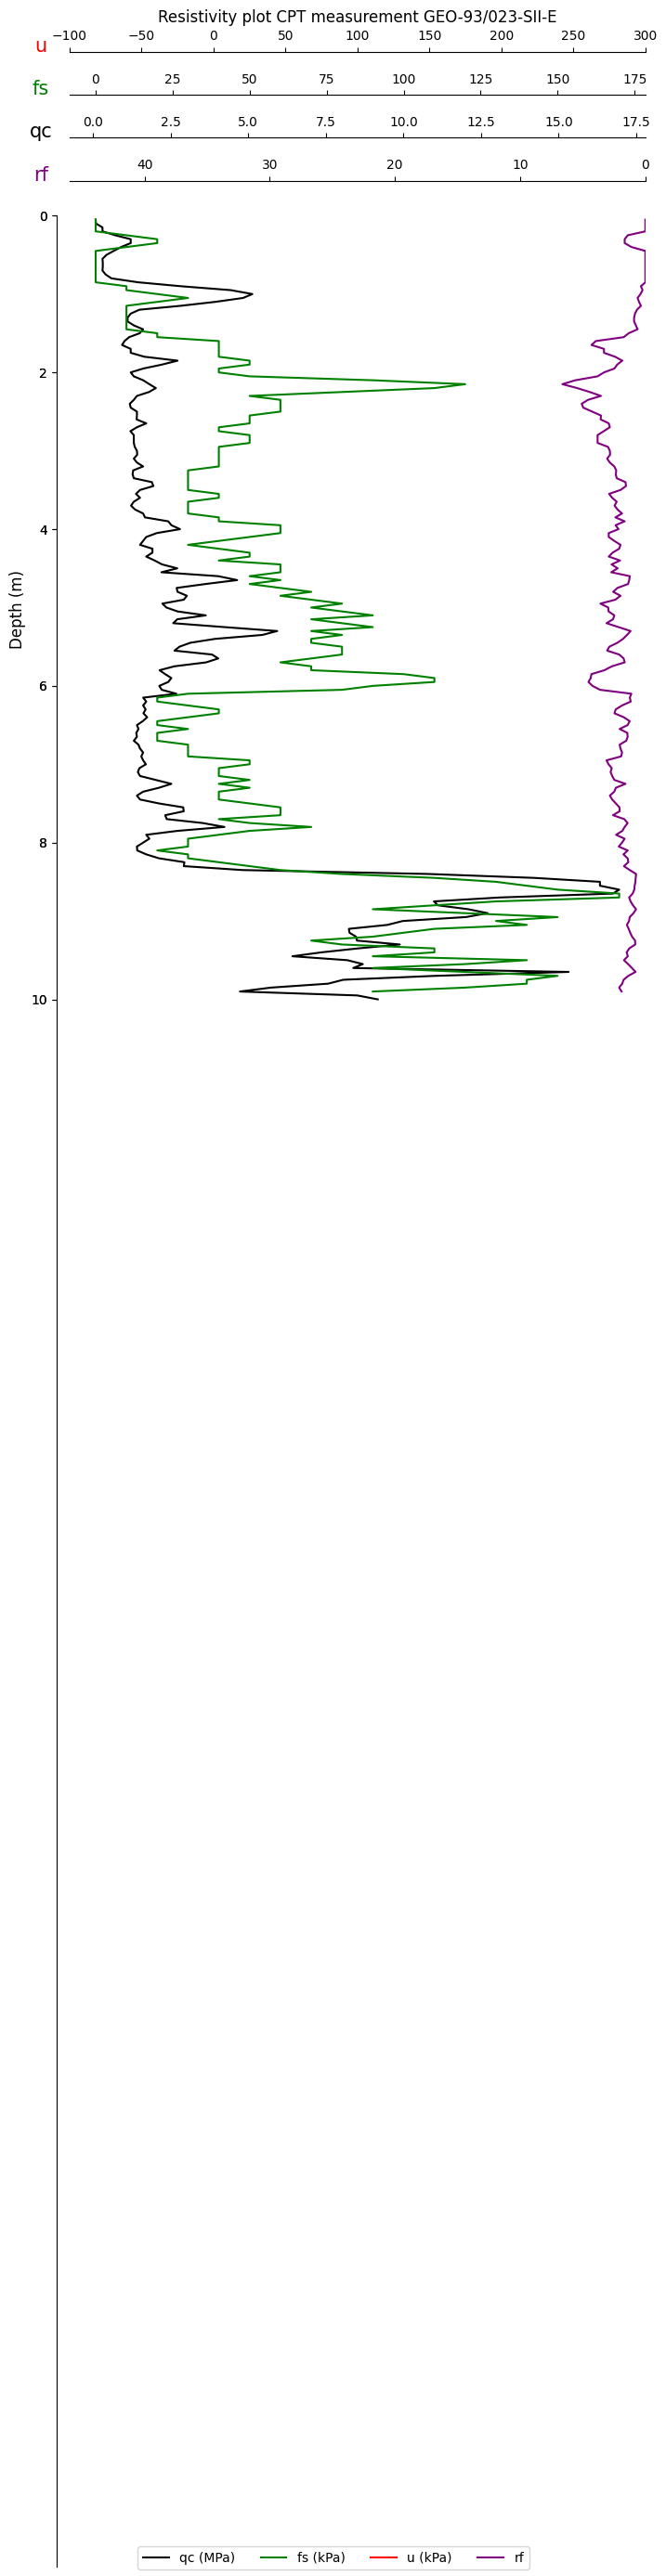

In [27]:
import matplotlib.pyplot as plt

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


# Determine Lengte or Depth
# If diepte is available, the y-axis will be Diepte
# Else the y-axis will be Lengte
if df_sond['diepte'].isnull().values.any():
    # IsNan
    y_type = "lengte"
    y_axis = "Length (m)"
else:
    y_type = "diepte"
    y_axis = "Depth (m)"


fig, ax0 = plt.subplots(figsize=(8, 12))

# Prepare the individual axis
ax_qc = ax0.twiny()
ax_fs = ax0.twiny()
ax_u = ax0.twiny()
ax_rf = ax0.twiny()

for i, ax in enumerate([ax_qc, ax_fs, ax_u]):
    ax.spines["top"].set_position(("axes", 1+0.05*(i+1)))
    make_patch_spines_invisible(ax)
    ax.spines["top"].set_visible(True)

# Plot the data on the axis
df_sond.plot(x="rf", y=y_type, label="rf", ax=ax_rf, color='purple', legend=False)
df_sond.plot(x="qc", y=y_type, label="qc (MPa)", ax=ax_qc, color='black', legend=False)
df_sond.plot(x="fs", y=y_type, label="fs (kPa)", ax=ax_fs, color='green', legend=False)
df_sond.plot(x="u", y=y_type, label="u (kPa)", ax=ax_u, color='red',
        legend=False, xlim=(-100, 300)) # ! 300 is hardocded here for the example

# styling and configuration
ax_rf.xaxis.label.set_color('purple')
ax_fs.xaxis.label.set_color('green')
ax_u.xaxis.label.set_color('red')

ax0.axes.set_visible(False)
ax_qc.axes.yaxis.set_visible(False)
ax_fs.axes.yaxis.set_visible(False)
for i, ax in enumerate([ax_rf, ax_qc, ax_fs, ax_u, ax0]):
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.xaxis.label.set_fontsize(15)
    ax.xaxis.set_label_coords(-0.05, 1+0.05*i)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['left'].set_bounds(0, 30)
ax_rf.set_xlim(0, 46)

ax_u.set_title("Resistivity plot CPT measurement GEO-93/023-SII-E", fontsize=12)

ax0.invert_yaxis()
ax_rf.invert_xaxis()
ax_u.set_ylabel(y_axis, fontsize=12)
fig.legend(loc='lower center', ncol=4)
fig.tight_layout()

In [31]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

# convert the coordinates to lat/lon for folium
def convert_latlon(x1, y1):
    transformer = Transformer.from_crs("epsg:31370", "epsg:4326", always_xy=True)
    x2,y2 = transformer.transform(x1, y1)
    return x2, y2

df['lon'], df['lat'] = zip(*map(convert_latlon, df['x'], df['y']))
# convert to list
loclist = df[['lat', 'lon']].values.tolist()

# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=11)
marker_cluster = MarkerCluster().add_to(fmap)
for loc in range(0, len(loclist)):
    folium.Marker(loclist[loc], popup=df['sondeernummer'][loc]).add_to(marker_cluster)
fmap

/tmp/ipykernel_5961/13980274.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'], df['lat'] = zip(*map(convert_latlon, df['x'], df['y']))


KeyError: 1